In [3]:
import json
def cleanData(item):
    """
    Clean individual item data, keeping only English entries and specified fields.
    Returns None if no English item name exists.
    """
    # First check if there's an English item name - if not, skip this item
    hasEnglishName = False
    englishName = None
    
    for name in item.get('item_name', []):
        if name.get('language_tag', '').startswith('en'):
            hasEnglishName = True
            englishName = name['value']
            break
    
    if not hasEnglishName:
        return None
        
    # Initialize cleaned data with the basic fields
    cleanedItem = {
        'title': englishName,
        'otherImageIds': item.get('other_image_id', []),
        'mainImageId': item.get('main_image_id'),
        'country': item.get('country'),
        'domainName': item.get('domain_name'),
        'bulletPoints': [],
        'keywords': [],
        'color': None,
        'productType': None,
        'style': None
    }
    
    # Extract English bullet points
    for point in item.get('bullet_point', []):
        if point.get('language_tag', '').startswith('en'):
            cleanedItem['bulletPoints'].append(point['value'])
    
    # Extract English keywords
    for keyword in item.get('item_keywords', []):
        if keyword.get('language_tag', '').startswith('en'):
            cleanedItem['keywords'].append(keyword['value'])
    
    # Extract English color
    for color in item.get('color', []):
        if color.get('language_tag', '').startswith('en'):
            cleanedItem['color'] = color['value']
            break
    
    # Extract product type (usually doesn't have language tag)
    if item.get('product_type'):
        cleanedItem['productType'] = item['product_type'][0].get('value')
    
    # Extract English style
    for style in item.get('style', []):
        if style.get('language_tag', '').startswith('en'):
            cleanedItem['style'] = style['value']
            break
    
    return cleanedItem

def processJsonFile(filePath):
    """
    Process the entire JSON file and return cleaned data
    """
    cleanedData = []
    
    with open(filePath, 'r') as file:
        for line in file:
            item = json.loads(line)
            cleanedItem = cleanData(item)
            if cleanedItem:  # Only append if item has English title
                cleanedData.append(cleanedItem)
    
    return cleanedData

# Example usage
files = [f"metadata/listings_{hex(i)[2:]}.json" for i in range(16)]

allCleanedData = []
for file in files: 
    cleanedData = processJsonFile(file)
    allCleanedData.extend(cleanedData)

print(len(allCleanedData))


    


122734


In [4]:
import pandas as pd

df = pd.DataFrame(allCleanedData)
df.head()

,title,otherImageIds,mainImageId,country,domainName,bulletPoints,keywords,color,productType,style
0,"AmazonBasics PETG 3D Printer Filament, 1.75mm,...","[81A0u5L4VAL, 61xhS6iLrZL]",81NP7qh2L6L,AE,amazon.ae,[3D printer filament with 1.75mm diameter + / ...,"[3d printer filament, petg printer filament, p...",Translucent Yellow,MECHANICAL_COMPONENTS,1-Pack
1,"Stone & Beam Stone Brown Swatch, 25020039-01",[],61Rp4qOih9L,GB,amazon.co.uk,[],"[love, loveseat, queen, for, couch, chesterfie...",Stone Brown,SOFA,None
2,The Fix Amazon Brand Women's French Floral Emb...,"[71C4hQAAs2L, 718uEco1DAL, 71BMHcaG5GL, 7105Js...",714CmIfKIYL,AU,amazon.com.au,[Embroidered flowers bloom against understated...,[zapatos shoe para de ladies mujer womans moca...,Havana Tan,SHOES,French Loafer Slide
3,Amazon Brand - Solimo Designer Autumn Girl 3D ...,"[51wiRu6gT9L, 51DEYNWtfsL, 81RoDPeqygL, 518Ryp...",81+4dBN1jsL,IN,amazon.in,"[Snug fit for Mi Redmi Go, with perfect cut-ou...","[cellphonecover, backcase, mobileguard, mobile...",Multicolor,CELLULAR_PHONE_CASE,None
4,Amazon Brand - Solimo Designer Butterflies Pri...,"[618uWaH5elL, 61hUyEcVYtL, 61ajxcF6Y1L, 613aK9...",61LWeNhjZ9L,IN,amazon.in,"[Snug fit for Xiaomi Redmi Y2, with perfect cu...",[Xiaomi Redmi Y2 Mobile back case cover transp...,multi-colored,CELLULAR_PHONE_CASE,None


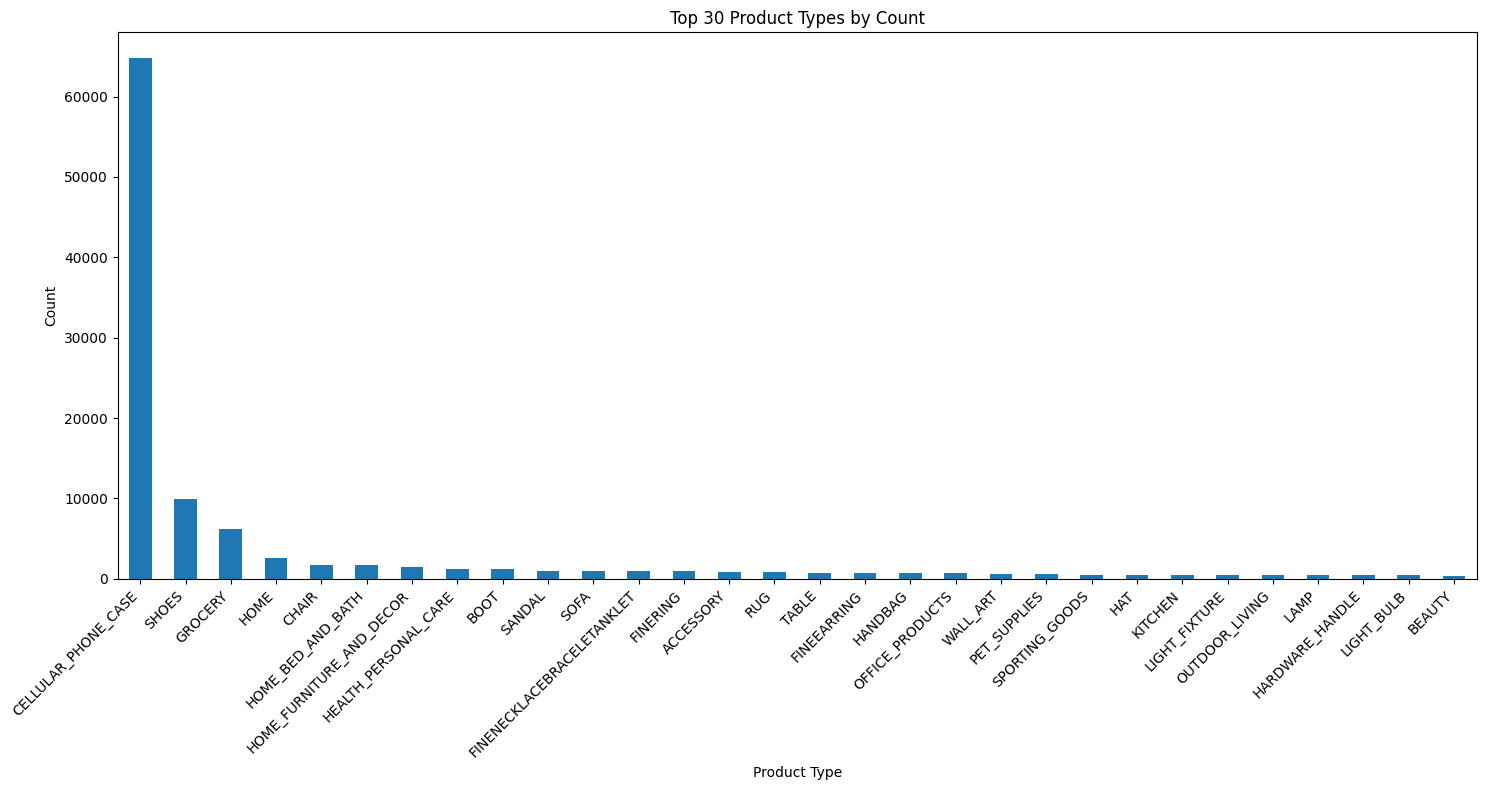

In [5]:
import matplotlib.pyplot as plt 

# Create a bar chart showing product type distribution
productTypeCounts = df['productType'].value_counts().head(30)  # Get top 30 categories
plt.figure(figsize=(15, 8))
productTypeCounts.plot(kind='bar')
plt.title('Top 30 Product Types by Count')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
SHOE_PRODUCT_TYPES = ["SHOES", "SANDAL", "BOOT", "TECHNICAL_SPORT_SHOE"]

In [7]:
images = "metadata/images.csv"

imageDf = pd.read_csv(images)
imageDf.head()

,image_id,height,width,path
0,010-mllS7JL,106,106,14/14fe8812.jpg
1,01dkn0Gyx0L,122,122,da/daab0cad.jpg
2,01sUPg0387L,111,111,d2/d2daaae9.jpg
3,1168jc-5r1L,186,186,3a/3a4e88e6.jpg
4,11RUV5Fs65L,30,500,d9/d91ab9cf.jpg


In [8]:
# Join the dataframes on mainImageId and image_id
mergedDf = df.merge(imageDf, left_on='mainImageId', right_on='image_id', how='left')
mergedDf.head()

# Filter for shoe products and large images
shoeImages = mergedDf[
    (mergedDf['productType'].isin(SHOE_PRODUCT_TYPES)) & 
    (mergedDf['height'] > 500) & 
    (mergedDf['width'] > 500)
]

print(f"Found {len(shoeImages)} shoe images larger than 500x500 pixels")

Found 11941 shoe images larger than 500x500 pixels


/var/folders/sv/j191z1qd17568426m9h_0clm0000gn/T/ipykernel_59453/1358794965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shoeImages.loc[:, 'fullImagePath'] = shoeImages['path'].apply(lambda x: IMAGE_MAIN_DIRECTORY + x)


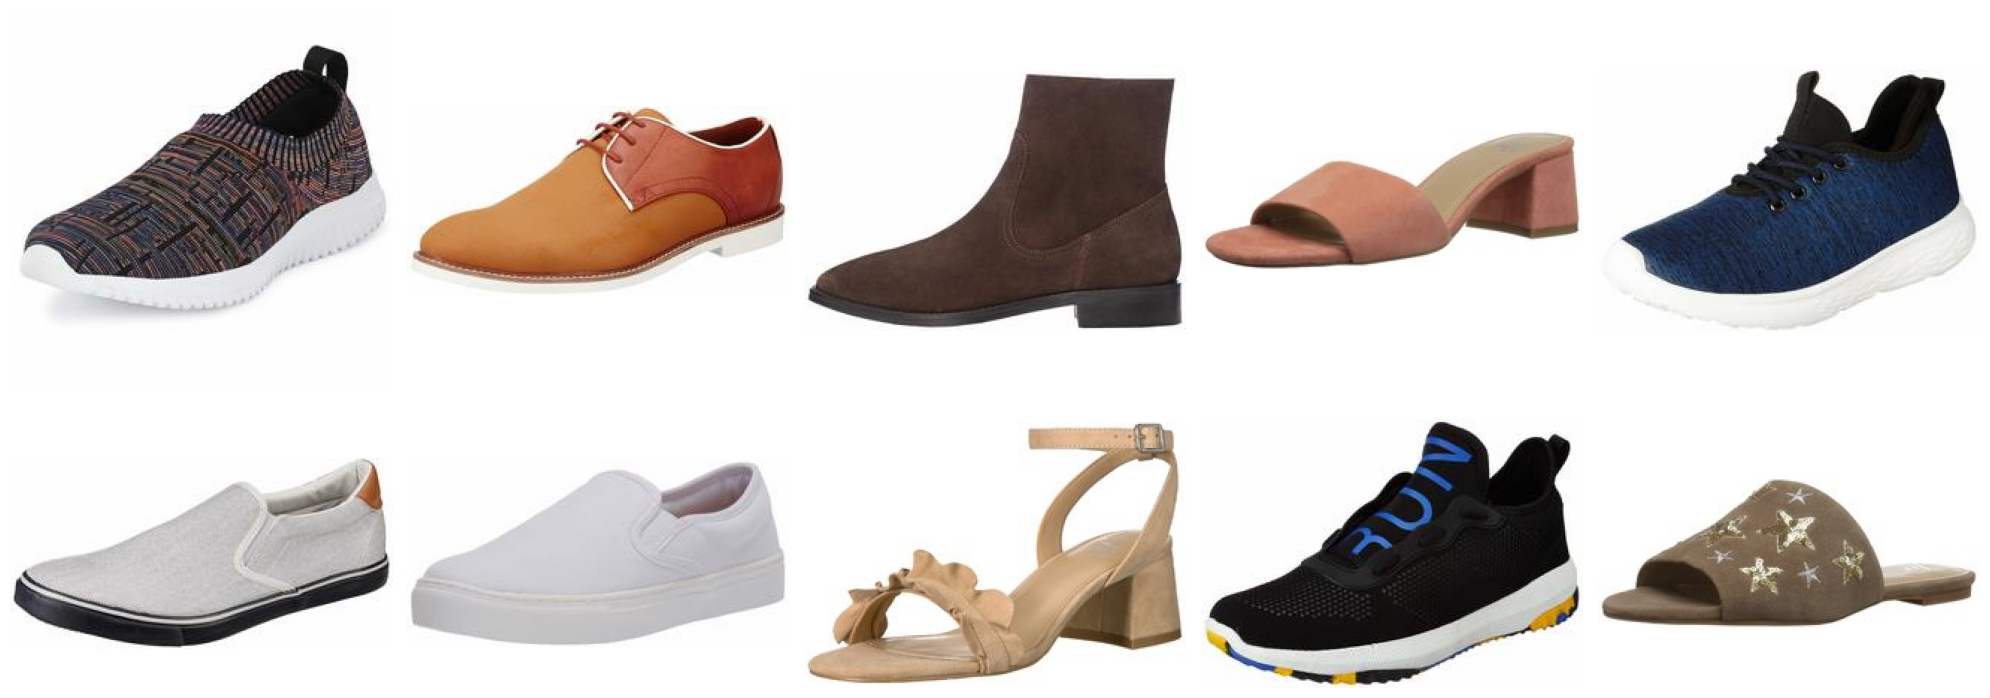

In [9]:
IMAGE_MAIN_DIRECTORY = "small/"

# Get full image paths by joining directory and path
shoeImages.loc[:, 'fullImagePath'] = shoeImages['path'].apply(lambda x: IMAGE_MAIN_DIRECTORY + x)

# Get 10 random shoe images
randomShoeImages = shoeImages.sample(n=10, random_state=42)

# Create a figure with 2 rows and 5 columns
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

# Plot each image
for idx, (_, row) in enumerate(randomShoeImages.iterrows()):
    img = plt.imread(row['fullImagePath'])
    axes[idx].imshow(img)
    axes[idx].axis('off')
    # axes[idx].set_title(f"Product: {row['productType']}\nStyle: {row['style']}")

plt.tight_layout()
plt.show()

In [9]:
# 2: embed the images separately, embed the metadata separately
# 3: return score = 0.4*image_embedding_similarity + 0.6*metadata_embedding_similarity
# 4: get top 6 products based on the score
# 5: print images of top 6 products
# see if it lines up
# text embedding can be 3-small, image embedding we will have to experiment. Same with weights - se if image embedding is even needed?

In [10]:
# No need to run - this was just me trying to see if embedding works. 
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
from tqdm import tqdm

tqdm.pandas()

clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32", use_fast=True)
clip_model.eval()  

def embed_image(path):
    image = Image.open(path).convert("RGB")
    inputs = clip_processor(images=image, return_tensors="pt").to("cuda")
    with torch.no_grad():
        image_features = clip_model.get_image_features(**inputs)
        image_features = image_features / image_features.norm(p=2, dim=-1, keepdim=True) 
    return image_features.squeeze().cpu()

shoeImages = shoeImages.copy() 
shoeImages['fullImagePath'] = shoeImages['path'].apply(lambda x: IMAGE_MAIN_DIRECTORY + x)

/Users/riti/Desktop/Xactly/xactly/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
import torch
import numpy as np
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import pandas as pd
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
tqdm.pandas()

# Load CLIP model (on CPU) (i think if you use GPU then you use .to.cuda but not sure)
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32", use_fast=True)
clip_model.eval() 

def embed_image(path):
    image = Image.open(path).convert("RGB")
    inputs = clip_processor(images=image, return_tensors="pt")
    with torch.no_grad():
        image_features = clip_model.get_image_features(**inputs)
        # Normalizing embeddings here
        image_features = image_features / image_features.norm(p=2, dim=-1, keepdim=True) 
    return image_features.squeeze().cpu()

IMAGE_MAIN_DIRECTORY = "small/"  

shoeImages = shoeImages.copy()
shoeImages['fullImagePath'] = shoeImages['path'].apply(lambda x: IMAGE_MAIN_DIRECTORY + x)

shoeImages['imageEmbedding'] = shoeImages['fullImagePath'].progress_apply(embed_image)

# Querying by image
def get_top_k_by_image(query_idx, df, top_k=6):
    query_image_vec = df.iloc[query_idx]['imageEmbedding'].unsqueeze(0)
    all_image_embeddings = torch.stack(df['imageEmbedding'].tolist())

    image_sims = cosine_similarity(query_image_vec.cpu(), all_image_embeddings.cpu())[0]
    top_indices = np.argsort(image_sims)[::-1]
    top_indices = [i for i in top_indices if i != query_idx][:top_k]

    return df.iloc[top_indices]

# Top 6 products similar to the first shoe in dataset
top6_images_only = get_top_k_by_image(0, shoeImages)
print(top6_images_only[['title', 'productType', 'style', 'color']])


100%|██████████| 11941/11941 [04:53<00:00, 40.67it/s]


                                                    title productType  \
29892   The Fix Amazon Brand Women's French Floral Emb...       SHOES   
88945   206 Collective Amazon Brand Women's Madison Ba...       SHOES   
59025   Amazon Brand - 206 Collective Women's Madison ...       SHOES   
83697   206 Collective Women's Madison Ballet Flat, Nu...       SHOES   
101065  Amazon Brand - Symbol Men's Beige Leather Form...       SHOES   
103218   Amazon Brand - Symbol Men's Leather Formal Shoes       SHOES   

                      style         color  
29892   French Loafer Slide          None  
88945   Madison Ballet Flat  Nude Leather  
59025   Madison Ballet Flat  Nude Leather  
83697   Madison Ballet Flat  Nude Leather  
101065                 None         Beige  
103218                 None          None  


In [14]:
# Save
shoeImages.to_pickle("shoeImages_with_clip_embeddings.pkl")
# Load later
shoeImages = pd.read_pickle("shoeImages_with_clip_embeddings.pkl")


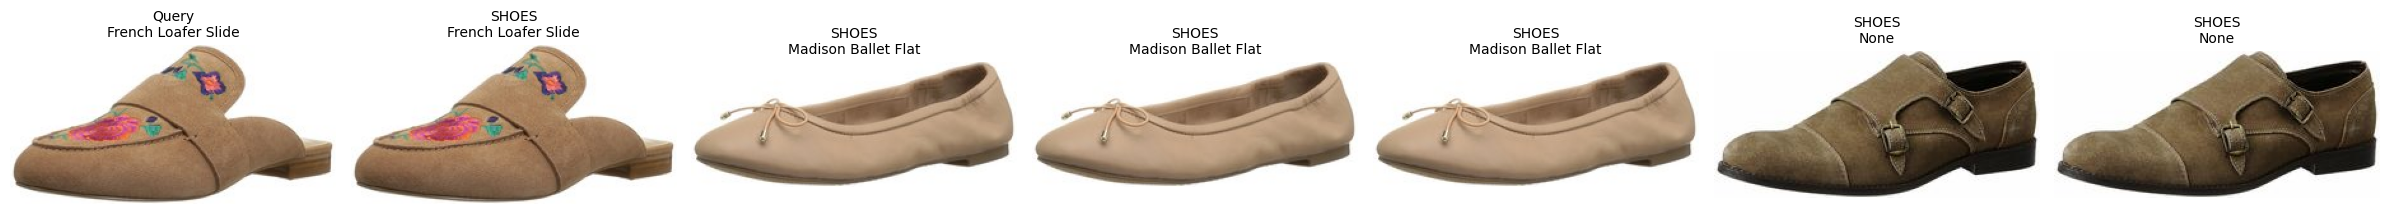

In [15]:
import matplotlib.pyplot as plt
from PIL import Image
query_idx = 0
query_row = shoeImages.iloc[query_idx]
all_rows = [query_row] + [row for _, row in top6_images_only.iterrows()]

fig, axes = plt.subplots(1, 7, figsize=(24, 5))
axes = axes.ravel()

for i, row in enumerate(all_rows):
    try:
        img = Image.open(row['fullImagePath'])
        axes[i].imshow(img)
        if i == 0:
            axes[i].set_title("Query\n" + (row['style'] or ''), fontsize=10)
        else:
            axes[i].set_title(f"{row['productType']}\n{row['style']}", fontsize=10)
        axes[i].axis('off')
    except Exception as e:
        print(f"Error loading image {row['fullImagePath']}: {e}")

plt.tight_layout()
plt.show()


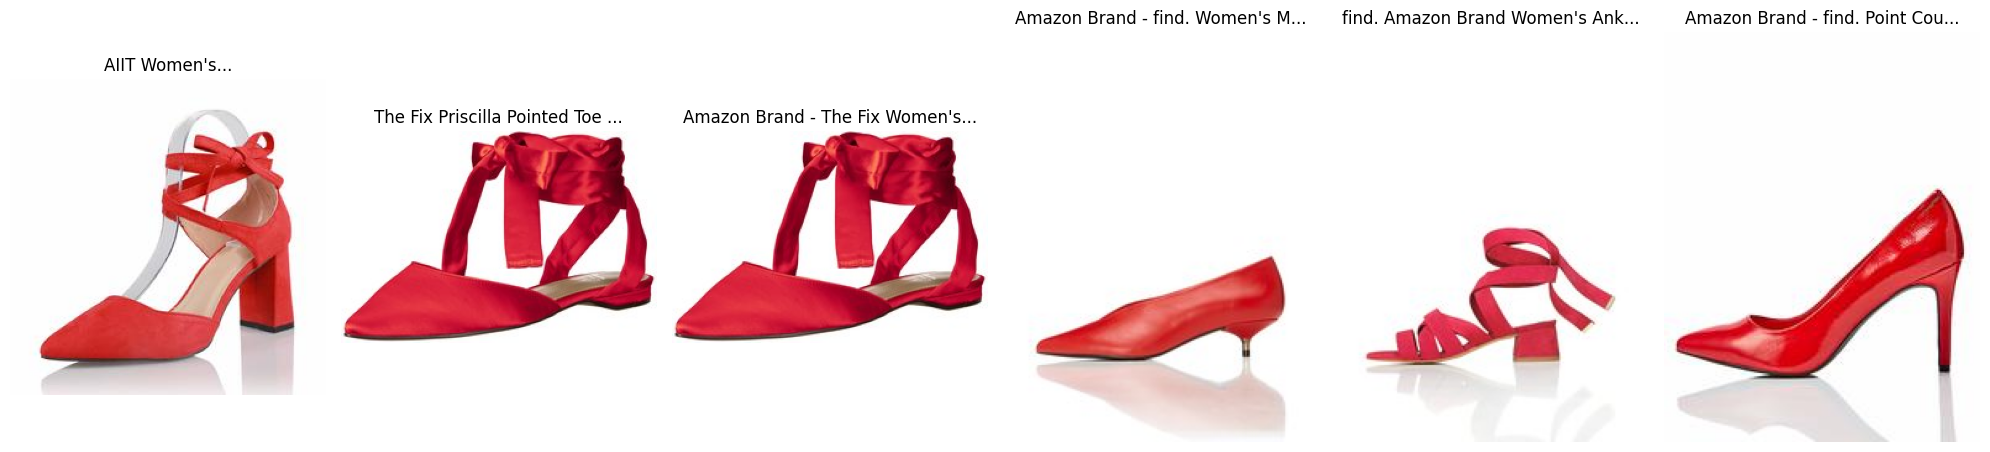

In [16]:
def embed_text_query(text):
    inputs = clip_processor(text=[text], return_tensors="pt")
    with torch.no_grad():
        text_features = clip_model.get_text_features(**inputs)
        text_features = text_features / text_features.norm(p=2, dim=-1, keepdim=True)
    return text_features.squeeze().cpu()


def search_images_by_text(text_query, df, top_k=6):
    query_vec = embed_text_query(text_query).unsqueeze(0)
    image_embeddings = torch.stack(df['imageEmbedding'].tolist())
    
    scores = cosine_similarity(query_vec.cpu(), image_embeddings.cpu())[0]
    top_indices = np.argsort(scores)[::-1][:top_k]
    
    return df.iloc[top_indices]

def show_image_results(results_df):
    fig, axes = plt.subplots(1, len(results_df), figsize=(20, 5))
    for i, (_, row) in enumerate(results_df.iterrows()):
        img = plt.imread(row['fullImagePath'])
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(row['title'][:30] + '...')
    plt.tight_layout()
    plt.show()

query = "red high heels"
results = search_images_by_text(query, shoeImages)
show_image_results(results)


In [ ]:
from transformers import CLIPModel, CLIPTokenizer, CLIPImageProcessor
import pickle
import torch
from PIL import Image

clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")
clip_image_processor = CLIPImageProcessor.from_pretrained("openai/clip-vit-base-patch32")

def embed_with_clip(text=None, image_path=None):
    if text:
        inputs = clip_tokenizer(
            text,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=77
        )
        with torch.no_grad():
            text_features = clip_model.get_text_features(**inputs)
            text_features = text_features / text_features.norm(p=2, dim=-1, keepdim=True)
        return text_features.squeeze().cpu()

    if image_path:
        image = Image.open(image_path).convert("RGB")
        inputs = clip_image_processor(images=image, return_tensors="pt")
        with torch.no_grad():
            image_features = clip_model.get_image_features(**inputs)
            image_features = image_features / image_features.norm(p=2, dim=-1, keepdim=True)
        return image_features.squeeze().cpu()

def construct_metadata_text(row):
    parts = [
        row['title'],
        row['style'] if pd.notnull(row['style']) else '',
        row['color'] if pd.notnull(row['color']) else '',
        " ".join(row['bulletPoints']) if row['bulletPoints'] else '',
        " ".join(row['keywords']) if row['keywords'] else '',
        row['productType'] if pd.notnull(row['productType']) else ''
    ]
    return ". ".join(filter(None, parts))

from tqdm import tqdm
tqdm.pandas()

shoeImages['metadataText'] = shoeImages.apply(construct_metadata_text, axis=1)
shoeImages['clipTextEmbedding'] = shoeImages['metadataText'].progress_apply(lambda text: embed_with_clip(text=text))



/var/folders/sv/j191z1qd17568426m9h_0clm0000gn/T/ipykernel_59453/1864508024.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shoeImages['metadataText'] = shoeImages.apply(construct_metadata_text, axis=1)
100%|██████████| 11941/11941 [02:49<00:00, 70.63it/s]
/var/folders/sv/j191z1qd17568426m9h_0clm0000gn/T/ipykernel_59453/1864508024.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shoeImages['clipTextEmbedding'] = shoeImages['metadataText'].progress_apply(lambda text: embed_with_clip(text=text))
  0%

NameError: name 'Image' is not defined

In [13]:
from PIL import Image
shoeImages['clipImageEmbedding'] = shoeImages['fullImagePath'].progress_apply(lambda path: embed_with_clip(image_path=path))


# Save to file
with open("shoe_clip_embeddings.pkl", "wb") as f:
    pickle.dump(shoeImages, f)

100%|██████████| 11941/11941 [05:11<00:00, 38.37it/s]
/var/folders/sv/j191z1qd17568426m9h_0clm0000gn/T/ipykernel_59453/4205688871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shoeImages['clipImageEmbedding'] = shoeImages['fullImagePath'].progress_apply(lambda path: embed_with_clip(image_path=path))


In [ ]:
def query_with_text_and_image(
    text=None, image_path=None, df=shoeImages, top_k=6, image_dir="small/"
):
    components = []
    if text:
        text_vec = embed_with_clip(text=text)
        components.append(text_vec)
    if image_path:
        img_vec = embed_with_clip(image_path=image_path)
        components.append(img_vec)

    if not components:
        raise ValueError("Provide at least one of text or image.")

    query_vector = torch.stack(components).mean(dim=0)
    query_vector = query_vector / query_vector.norm()

    # Combine product embeddings
    item_vectors = torch.stack([
        (i + t) / 2 for i, t in zip(df['clipImageEmbedding'], df['clipTextEmbedding'])
    ])
    item_vectors = item_vectors / item_vectors.norm(dim=1, keepdim=True)

    sims = cosine_similarity(query_vector.unsqueeze(0).cpu(), item_vectors.cpu())[0]
    top_indices = np.argsort(sims)[::-1][:top_k]
    results = df.iloc[top_indices]

    # Plot query image
    if image_path:
        img = plt.imread(image_path)
        plt.figure(figsize=(3, 3))
        plt.imshow(img)
        plt.axis('off')
        plt.title("Query Image")
        plt.show()

    # Plot result images
    fig, axes = plt.subplots(1, top_k, figsize=(4 * top_k, 4))
    if top_k == 1:
        axes = [axes]

    for idx, (i, row) in enumerate(results.iterrows()):
        img_path = image_dir + row['path']
        img = plt.imread(img_path)
        axes[idx].imshow(img)
        axes[idx].axis('off')
        axes[idx].set_title(f"{row['productType']}\n{row['style'] or ''}")
    
    plt.tight_layout()
    plt.show()

    return results


results = query_with_text_and_image(
    text="red heels like this image but i want open toed in the front",
    image_path="small/13/133d2255.jpg"  # example path
)

results[['title', 'productType', 'color', 'style']]

NameError: name 'cosine_similarity' is not defined

In [30]:
def get_full_image_paths(results_df, image_dir="small/"):
    return results_df['path'].apply(lambda p: image_dir + p).tolist()


image_paths = get_full_image_paths(results)

print("Full paths of returned images:")
for path in image_paths:
    print(path)

Full paths of returned images:
small/1f/1f82929e.jpg
small/13/133d2255.jpg
small/ea/ea5b10ad.jpg
small/03/036bf6e5.jpg
small/30/30fbc76b.jpg
small/03/036bf6e5.jpg


In [19]:
from PIL import Image
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration

# Load BLIP model and processor (will use CPU)
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base", use_fast=True)
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
model.eval()

def generate_caption(image_path):
    image = Image.open(image_path).convert('RGB')
    inputs = processor(images=image, return_tensors="pt")

    with torch.no_grad():
        out = model.generate(**inputs)
        caption = processor.decode(out[0], skip_special_tokens=True)
    
    return caption


In [20]:
image_path = "small/13/133d2255.jpg"  # or your local image path
caption = generate_caption(image_path)
print("Caption:", caption)


Caption: red high heel shoes


In [22]:
from transformers import BlipProcessor, BlipForImageTextRetrieval

# Load retrieval model
retrieval_model = BlipForImageTextRetrieval.from_pretrained("Salesforce/blip-itm-base-coco")
retrieval_processor = BlipProcessor.from_pretrained("Salesforce/blip-itm-base-coco", use_fast=True)
retrieval_model.eval()

def get_similarity_score(image_path, text_query):
    image = Image.open(image_path).convert('RGB')
    inputs = retrieval_processor(images=image, text=text_query, return_tensors="pt")

    with torch.no_grad():
        score = retrieval_model(**inputs).logits_per_image.item()

    return score

In [32]:
def get_similarity_score(image_path, text_query):
    image = Image.open(image_path).convert('RGB')
    inputs = retrieval_processor(images=image, text=text_query, return_tensors="pt")

    with torch.no_grad():
        outputs = retrieval_model(**inputs)

    scores = outputs.itm_score

    # Handle [1, 2] shape → return first score
    if scores.ndim == 2 and scores.shape == (1, 2):
        return scores[0, 0].item()
    elif scores.ndim == 1:
        return scores[0].item()
    elif scores.ndim == 0:
        return scores.item()
    else:
        raise ValueError(f"Unexpected itm_score shape: {scores.shape}")





In [38]:
query = "a similar shoe but with a shorter heel"
scores = []
shoeImages_copy = shoeImages.copy()
shoeImages_copy = shoeImages_copy[:1000]
for idx, row in shoeImages_copy.iterrows():
    image_path = "small/" + row["path"]
    score = get_similarity_score(image_path, query)
    scores.append((score, idx))

# Sort and show top results
top = sorted(scores, key=lambda x: x[0], reverse=True)[:6]
top_df = shoeImages.iloc[[idx for (_, idx) in top]]


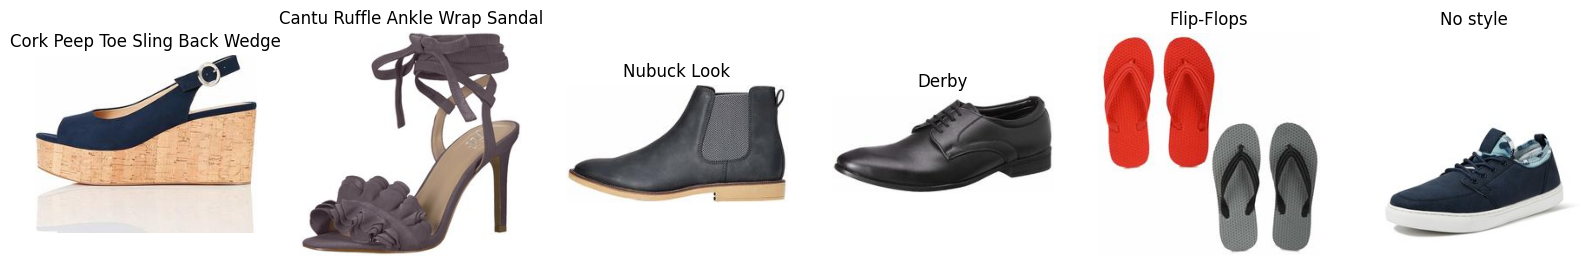

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 6, figsize=(20, 5))
for i, (_, row) in enumerate(top_df.iterrows()):
    img = Image.open("small/" + row["path"])
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"{row['style'] or 'No style'}")
plt.show()
